In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
  
df = pd.read_csv("Tema_4.csv")

# Análisis Exploratorio

El dataset contiene 4531 filas (registros) y 17 columnas


,Columnas,Tipo de dato,Valores no nulos,Valores nulos,Porcentaje nulos (%)
age,age,object,4305,226,4.99
job,job,object,4305,226,4.99
marital,marital,object,4305,226,4.99
education,education,object,4305,226,4.99
default,default,object,4305,226,4.99
balance,balance,float64,4306,225,4.97
housing,housing,object,4305,226,4.99
loan,loan,object,4304,227,5.01
contact,contact,object,4304,227,5.01
day,day,float64,4304,227,5.01


------------------------- LAS PRIMERAS FILAS DEL DATASET SON -------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,unknown_age,unemployed,married,primary,no,1787.0,no,NaN,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,NaN,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no


------------------------- VALORES NULOS DEL DATASET ------------------------


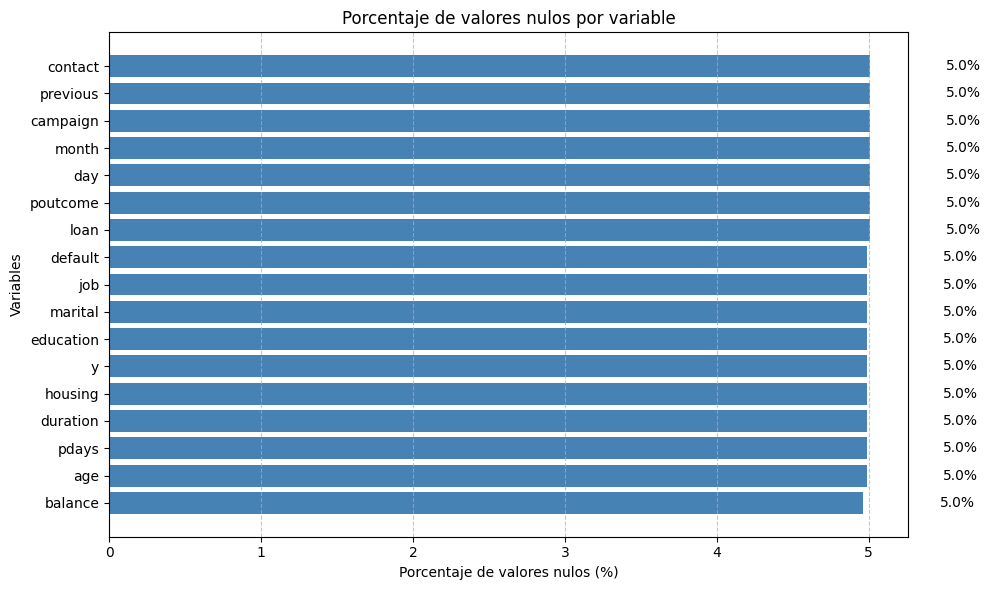

NameError: name 'total_celdas' is not defined

In [2]:
print(f"El dataset contiene {df.shape[0]} filas (registros) y {df.shape[1]} columnas")

filas = df.shape[0]
columnas = df.shape[1]
total_celdas = df.size

info_df = pd.DataFrame({
    'Columnas': df.columns,
    'Tipo de dato': df.dtypes,
    'Valores no nulos': df.notnull().sum(),
    'Valores nulos': df.isnull().sum(),
    'Porcentaje nulos (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

display(info_df)

print("------------------------- LAS PRIMERAS FILAS DEL DATASET SON -------------------------------")
display(df.head(3))

print("------------------------- VALORES NULOS DEL DATASET ------------------------")

porcentaje_nulos = (df.isnull().sum() / len(df) * 100).sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.barh(porcentaje_nulos.index, porcentaje_nulos.values, color='steelblue')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Variables')
plt.title('Porcentaje de valores nulos por variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(porcentaje_nulos.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.show()

num_nan_columna = df.isna().sum()  
porcentaje_nan_columna = (num_nan_columna / filas) * 100

num_nan_filas = df.isna().any(axis=1).sum()      # Filas con al menos un dato faltante
porcentaje_nan_filas = (num_nan_filas / filas) * 100

total_nan = df.isna().sum().sum()
porcentaje_nan_total = (total_nan / total_celdas) * 100

print(f'\nCantidad de datos nulos por columna: {num_nan_columna[num_nan_columna > 0]}')
print(f'\nPorcentaje columnas con datos nulos: {porcentaje_nan_columna [num_nan_columna > 0]}')
print(f'\nCantidad de filas con al menos un dato faltante: {num_nan_filas}')
print(f'\nPorcentaje de filas con al menos un dato faltante: {porcentaje_nan_filas}')
print(f'\nTotal de celdas con valores faltantes: {total_nan}')
print(f'\nPorcentaje del total de celdas con valores faltantes: {porcentaje_nan_total}')


print("------------------------- DUPLICADOS -------------------------------")
num_duplicados = df.duplicated().sum()
porcentaje_duplicados = (num_duplicados / filas) * 100

print(f'Cantidad de filas duplicadas: {num_duplicados}\n')
print(f'Porcentaje filas duplicadas: {porcentaje_duplicados}\n')
print(f'Las filas duplicadas son las siguientes:')
display(df[df.duplicated()])
